**Customer Churn Analysis**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
churn = pd.read_csv('/content/telecom_customer_churn.csv')
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
churn.shape

(7043, 38)

In [ ]:
churn.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [ ]:
# Check the percentage of null values in each column
null_summary = churn.isnull().sum().sort_values(ascending=False).to_frame(name="Null Count")
null_summary["Percentage(%)"] = (null_summary["Null Count"] / len(churn)) * 100
null_summary.head()

,Null Count,Percentage(%)
Churn Reason,5174,73.463013
Churn Category,5174,73.463013
Offer,3877,55.047565
Internet Type,1526,21.666903
Unlimited Data,1526,21.666903


In [ ]:
# Drop columns with >70% null values
df = churn.drop(columns=['Churn Reason', 'Churn Category'])

# Replace nulls with "Not Available" for categorical columns
categorical_columns = ['Internet Type', 'Unlimited Data', 'Streaming Music',
                       'Streaming Movies', 'Streaming TV', 'Premium Tech Support',
                       'Device Protection Plan', 'Online Security', 'Online Backup']

df[categorical_columns] = df[categorical_columns].fillna('Not Available')

# Replace nulls with the median for numerical columns
numerical_columns = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Replace nulls in the Offer column with 'No Offer'
df['Offer'] = df['Offer'].fillna('No Offer')

# Replace nulls in the Multiple Lines column with 'No'
df['Multiple Lines'] = df['Multiple Lines'].fillna('Not Available')

# Verify remaining nulls
print(df.isnull().sum().sort_values(ascending=False))

Customer ID                          0
Gender                               0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Online Backup                        0
Online Security                      0
Avg Monthly GB Download              0
Longitude                            0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                 

In [ ]:
# Check unique values in the columns after handling nulls
print(df['Offer'].unique())
print(df['Multiple Lines'].unique())
print(df['Contract'].unique())
print(df['Customer Status'].unique())

['No Offer' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
['No' 'Yes' 'Not Available']
['One Year' 'Month-to-Month' 'Two Year']
['Stayed' 'Churned' 'Joined']


In [ ]:
# CHURN ANALYSIS
churn_rate_by_contract = df.groupby('Contract')['Customer Status'].value_counts(normalize=True).unstack()
print(churn_rate_by_contract)

Customer Status   Churned    Joined    Stayed
Contract                                     
Month-to-Month   0.458449  0.113019  0.428532
One Year         0.107097  0.015484  0.877419
Two Year         0.025491  0.011683  0.962825


In [ ]:
# Average Revenue
avg_revenue_by_internet = df.groupby('Internet Type')['Total Revenue'].mean()
print(avg_revenue_by_internet)

Internet Type
Cable            2684.908711
DSL              2753.807234
Fiber Optic      4088.327654
Not Available    1432.040288
Name: Total Revenue, dtype: float64


In [ ]:
# Service Utilization on Multiple Lines
service_adoption = df[['Streaming TV', 'Streaming Movies', 'Premium Tech Support']].apply(pd.Series.value_counts)
print(service_adoption)

               Streaming TV  Streaming Movies  Premium Tech Support
No                     2810              2785                  3473
Yes                    2707              2732                  2044
Not Available          1526              1526                  1526


In [ ]:
# Tenure and Retention
avg_tenure_by_payment = df.groupby('Payment Method')['Tenure in Months'].mean()
print(avg_tenure_by_payment)

Payment Method
Bank Withdrawal    32.479918
Credit Card        34.109131
Mailed Check       19.142857
Name: Tenure in Months, dtype: float64


In [ ]:
# Step 1: Load the dataset
# Step 2: Data Preprocessing
# Drop irrelevant columns (e.g., 'Customer ID', 'Latitude', 'Longitude', etc.)
irrelevant_columns = ['Customer ID', 'City', 'Latitude', 'Longitude', 'Zip Code']
df = df.drop(columns=irrelevant_columns, errors='ignore')

# Handle missing values
df = df.fillna(method='ffill')  # Fill missing values forward (can be adjusted as needed)

# Encode categorical features
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-30-54fb40e6bf93>:8: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
# Separate features and target
X = df.drop('Customer Status', axis=1)  # Replace with your target column name
y = df['Customer Status']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the Model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       551
           1       0.71      0.55      0.62       153
           2       0.88      0.95      0.92      1409

    accuracy                           0.84      2113
   macro avg       0.77      0.71      0.73      2113
weighted avg       0.83      0.84      0.83      2113



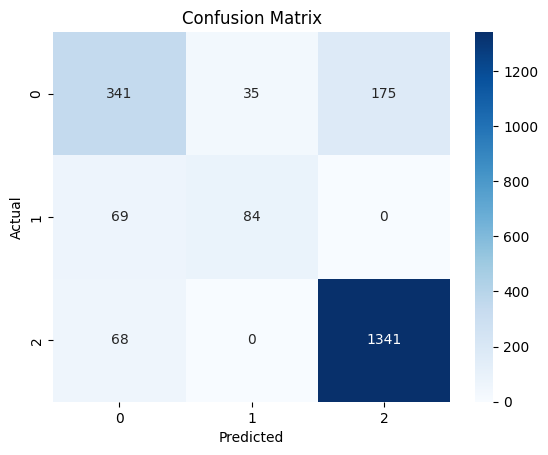

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

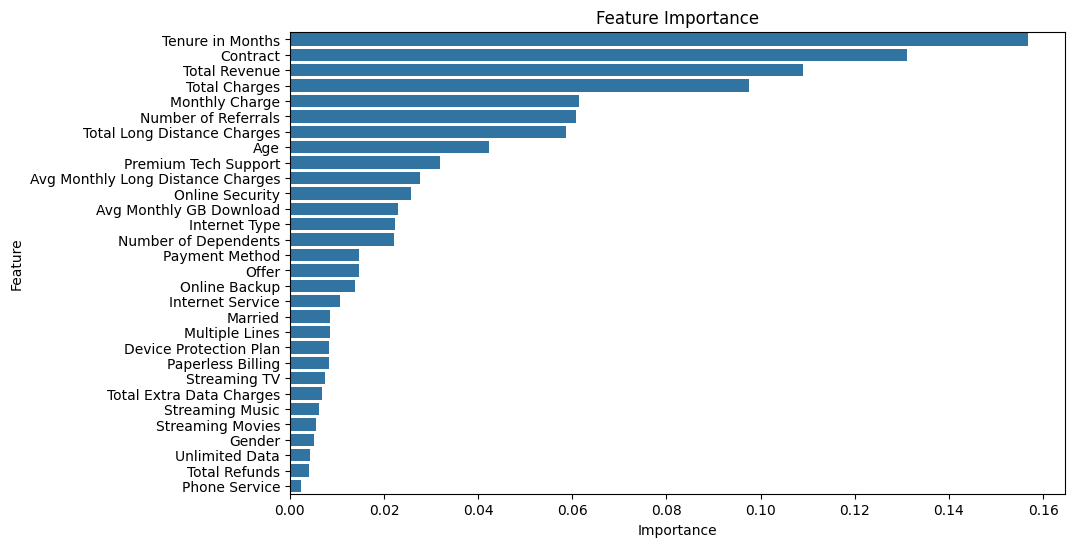

In [ ]:
# Step 8: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

In [ ]:
pip install plotly pandas

In [ ]:
import pandas as pd
import plotly.express as px

# Check for null values in Latitude and Longitude and drop rows if needed
geo_data = df.dropna(subset=['Latitude', 'Longitude'])

# Example: Color by 'Internet Type'
fig = px.scatter_mapbox(
    geo_data,
    lat="Latitude",
    lon="Longitude",
    color="Customer Status",  # Color by Internet Type (or replace with another column like 'Customer Status')
    size="Total Revenue",  # Adjust the size of points by revenue
    hover_name="City",  # Display city name on hover
    hover_data=["Total Revenue", "Tenure in Months"],
    title="Geographical Analysis of Customers by Internet Type",
    color_continuous_scale=px.colors.cyclical.IceFire,
    mapbox_style="carto-darkmatter",  # Use an open-source map style
    zoom=4,  # Initial zoom level
    height=600  # Height of the figure
)

# Show the map
fig.show()
